In [2]:
import agent as agent_object
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import ipywidgets as widgets

### Environnement

In [3]:
env = gym.make('MountainCar-v0').env

### Agents

In [4]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

agent_to_train = None
timesteps_per_episode_per_agent_array = {}

#### Sarsa

In [5]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'exploration_rate': {
        'er': 0.0001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0,
    'tile_coder': {
        'num_tiles': 14,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
sarsa_agent = agent_object.SarsaAgent(agent_init)

#### Q-Learning

In [6]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'exploration_rate': {
        'er': 0.0001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
q_learning_agent = agent_object.SarsaAgent(agent_init)

#### Expected Sarsa

In [7]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'exploration_rate': {
        'er': 0.0001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
expected_sarsa_agent = agent_object.ExpectedSarsaAgent(agent_init)

#### Sarsa Lambda

In [8]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'exploration_rate': {
        'er': 0.0001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0,
    'trace_decay': 0.9,
    'eligibility_method': 'replace',
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
sarsa_lambda_agent = agent_object.SarsaLambdaAgent(agent_init)

### RUN

In [9]:
agents = {
    'sarsa': sarsa_agent,
    'q_learning': q_learning_agent,
    'expected_sarsa': expected_sarsa_agent,
    'sarsa_lambda': sarsa_lambda_agent
}

In [12]:
if agent_to_train is None:
    agent_to_train = widgets.SelectMultiple(
        options=list(agents.keys()),
        value=list(agents.keys()),
        description='AGENTS',
        disabled=False
    )
agent_to_train

SelectMultiple(description='AGENTS', index=(3,), options=('sarsa', 'q_learning', 'expected_sarsa', 'sarsa_lamb…

In [13]:
n_episode = 800
t_max_per_episode = 200
verbose = False
graphical = False

timesteps_per_episode_per_agent = {}

np.random.seed(42)

for agent_name in agents.keys():
    timesteps_per_episode_per_agent[agent_name] = list()
    if agent_name not in timesteps_per_episode_per_agent_array:
        timesteps_per_episode_per_agent_array[agent_name] = np.array([])

In [14]:
for agent_name, agent in agents.items():
    
    if agent_name not in agent_to_train.value:
        continue
        
    for i_episode in tqdm(range(n_episode)):

        rewards = 0
        state = env.reset()
        next_action = agent.episode_init(state)

        for t in range(t_max_per_episode):
            if graphical:
                env.render()

            state, reward, done, info = env.step(next_action)
            reward = agent.max_position_reward_function(state[0], reward)
            next_action = agent.update(state, reward, done)

            rewards += reward

            if done:
                break
        timesteps_per_episode_per_agent[agent_name].append(t)
        agents[agent_name].epsilon.next()
        
    agent.epsilon.reset()
env.close()

  0%|          | 0/800 [00:00<?, ?it/s]/home/benoit/Documents/work/reinforcement_learning/function_approximation/mountain_car/utils.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  possible_next_epsilon = 1/(np.abs(np.dot(eligibility, gamma * next_feature - current_feature)))
  0%|          | 1/800 [00:00<01:43,  7.75it/s]

current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (40

  0%|          | 2/800 [00:00<01:38,  8.13it/s]/home/benoit/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/benoit/Documents/work/reinforcement_learning/function_approximation/mountain_car/agent.py:184: RuntimeWarning: invalid value encountered in double_scalars
  td_error += self.discount_factor * np.sum(self.w[next_action, next_tiles])
  0%|          | 2/800 [00:00<01:43,  7.69it/s]

current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (4096,), next_feature: (4096,), eligibility: (4096,)
current_feature: (40

ValueError: 'a' cannot be empty unless no samples are taken

In [14]:
agents["sarsa_lambda"].learning_rate.history

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333

### ANALYSIS

In [22]:
rolling_mean_per_agent = {}
for agent_name, timesteps_per_episode in timesteps_per_episode_per_agent.items():
    if not timesteps_per_episode:
        continue
    timesteps_per_episode_per_agent_array[agent_name] = np.concatenate(
        [timesteps_per_episode_per_agent_array[agent_name], 
         np.array(timesteps_per_episode)]
    )
    print(f'best score for {agent_name} agent: {timesteps_per_episode_per_agent_array[agent_name].min()}')
    

best score for sarsa agent: 82.0


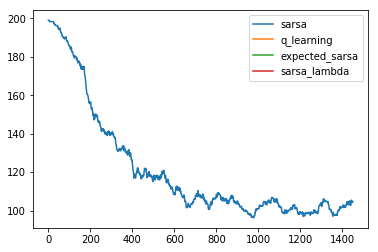

In [23]:
for agent_name, timesteps_per_episode in timesteps_per_episode_per_agent.items():
    
    timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=50)
    plt.plot(range(len(timesteps_per_episode_rolling_mean)), 
             timesteps_per_episode_rolling_mean,
            label=agent_name)

plt.legend()

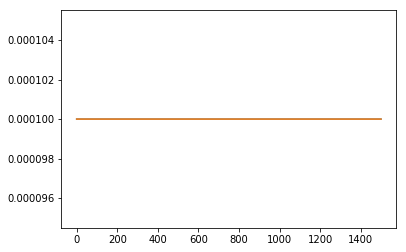

In [152]:
for agent_name, agent in agents.items():
    exploration_rate_history = agent.epsilon.history
    plt.plot(range(len(exploration_rate_history)), exploration_rate_history,
            label=agent_name)

In [140]:
env.close()

[2, 3, 4]